In [1]:
num_of_lines=800

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')

patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(800, 70)


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529
5,10,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.496533,0.275733,0.904000,0.811733,0.432533,0.000000
6,12,10,LOS_8-13,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.115471,1.116262,1.190400,1.186267,1.632667,1.172213
7,14,8,LOS_8-13,1,1,1,1,0,1,1,...,0.0,0.000000,0.0,0.0,0.598987,0.000000,0.000000,0.000000,0.000000,0.000000
8,15,11,LOS_8-13,1,1,1,1,0,1,0,...,0.0,0.000000,0.0,0.0,0.432062,0.686769,0.686769,0.686769,0.686769,0.153971
9,16,9,LOS_8-13,1,1,1,1,0,1,1,...,0.0,0.000000,0.0,0.0,0.600495,0.374210,0.098057,0.350786,0.709757,0.076419


In [58]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 0)

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

In [64]:
no_age=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['age']!='NAN']
no_age.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [65]:

no_age.shape

(760, 70)

In [4]:
#no_apachi0=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['APACHEII']>0]

In [9]:
#no_apachi0.shape

# select vars:

In [66]:
x1 = no_age[['age','BMI','trauma','metabolic','gastrointestinal','Sepsis','pro_to_target_day0','pro_to_target_day1','pro_to_target_day2','pro_to_target_day3','pro_to_target_day4','pro_to_target_day5']]
print(x1.shape)

(760, 12)


In [67]:
target = no_age[['ICU_mortality']]
target.shape

(760, 1)

In [68]:
target.value_counts(normalize=True) * 100

ICU_mortality
0                75.789474
1                24.210526
dtype: float64

In [27]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    object 
 1   BMI                 800 non-null    float64
 2   trauma              800 non-null    int64  
 3   metabolic           800 non-null    int64  
 4   gastrointestinal    800 non-null    int64  
 5   Sepsis              800 non-null    int64  
 6   pro_to_target_day0  800 non-null    float64
 7   pro_to_target_day1  800 non-null    float64
 8   pro_to_target_day2  800 non-null    float64
 9   pro_to_target_day3  800 non-null    float64
 10  pro_to_target_day4  800 non-null    float64
 11  pro_to_target_day5  800 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 81.2+ KB


LabelEncoder:

# train_test_split

In [69]:

from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head(10)

,age,BMI,trauma,metabolic,gastrointestinal,Sepsis,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5
305,51,51.423324,0,1,0,1,0.226366,0.347890,0.348132,0.320330,0.303165,0.326132
703,62,19.591837,0,1,1,1,0.770786,0.824615,0.824615,0.824615,0.738145,0.000000
246,36,25.000000,1,0,0,0,0.000000,0.000000,0.039254,0.689341,0.689341,0.607571
658,76,31.141869,0,1,0,1,0.509658,0.549744,0.549744,0.549744,0.040467,0.232131
630,55,28.409091,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
542,61,27.548209,0,1,0,1,0.366954,0.000000,0.094769,0.538605,0.632923,0.462113
217,19,17.301038,0,1,0,1,0.824492,0.649846,0.649846,0.651651,0.649846,0.824650
729,79,17.578125,0,0,0,0,0.010530,0.149897,0.000000,0.000000,0.000000,0.000000
373,85,33.057851,0,1,0,0,0.390484,0.495030,0.587352,0.587352,0.587352,0.693922
244,20,23.661439,1,0,1,0,0.000000,0.364761,1.329762,1.329762,1.263754,0.000000


# models review:

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)

In [70]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

    
    print('---------%s---------' % name)
    stats(y_test,y_pred)

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

---------LR---------
accuracy_score: 0.754
recall: 0.018
precision: 0.333
F-Measure: 0.034
---------LDA---------
accuracy_score: 0.754
recall: 0.018
precision: 0.333
F-Measure: 0.034
---------KNN---------
accuracy_score: 0.711
recall: 0.091
precision: 0.238
F-Measure: 0.132
---------DT---------
accuracy_score: 0.636
recall: 0.382
precision: 0.300
F-Measure: 0.336
---------RF---------
accuracy_score: 0.746
recall: 0.018
precision: 0.200
F-Measure: 0.033
---------NB---------
accuracy_score: 0.754
recall: 0.127
precision: 0.467
F-Measure: 0.200
---------SVM---------
accuracy_score: 0.759
recall: 0.000
precision: 0.000
F-Measure: 0.000


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# transform data
#x_train2 = scaler.fit_transform(x_train)
#x_test2 = scaler.fit_transform(x_test)

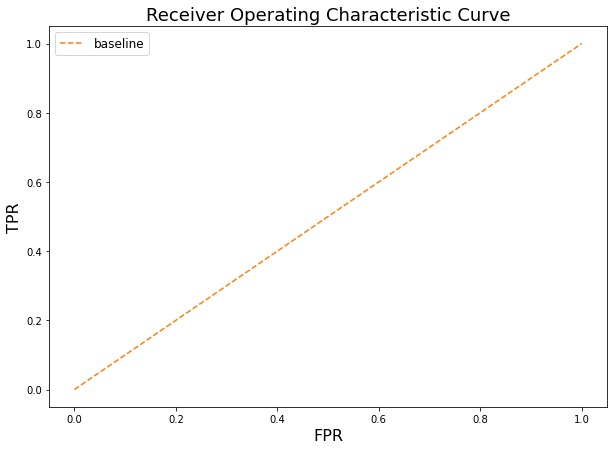

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

models = []

models.append(('DT', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
for name, model in models:
    
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    roc_values = []
    for thresh in np.linspace(0, 1, 100):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        roc_values.append([tpr, fpr])
    tpr_values, fpr_values = zip(*roc_values)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(fpr_values, tpr_values)
    ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
    plt.title('Receiver Operating Characteristic Curve', fontsize=18)
    plt.ylabel('TPR', fontsize=16)
    plt.xlabel('FPR', fontsize=16)
    plt.legend(fontsize=12);




to fix!

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 18
False Positives: 47
True Negatives: 126
False Negatives: 37


# DecisionTreeClassifier

In [47]:


dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)


Criterion=gini 0.6101694915254238
recall: 0.294
Criterion=entropy 0.6610169491525424
recall: 0.353


In [48]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

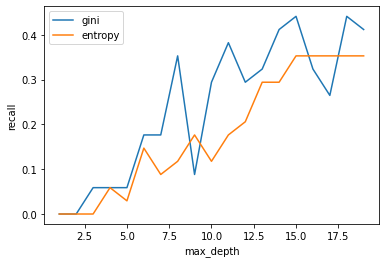

In [45]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
#parameters: targets to be predicted and predictions from new data used before

In [ ]:
#explain:

# visual tree:

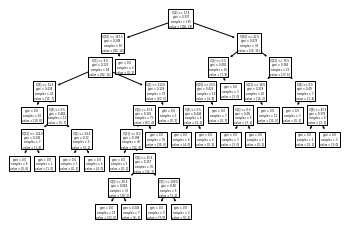

In [49]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

# RandomForestClassifier-to delete

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 40, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

predictionforest = model.best_estimator_.predict(x_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

(266, 8)

(266,)

0.55

Criterion=gini 0.575
Criterion=entropy 0.525


0.6625